# Ejercicio 1)

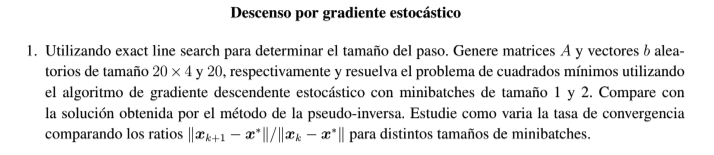

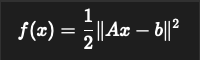

In [ ]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funcion_objetivo(A, x, b):
  return 0.5 * (np.linalg.norm(A @ x - b) ** 2)

In [ ]:
def funcion_gradiente(A, x, b):
  return A.T @ (A @ x - b)

In [ ]:
def exact_line_search(A, x, b):
    g = funcion_gradiente(A, x, b)
    Ag = A @ g
    alpha = (g @ g) / (Ag @ Ag)
    return alpha

In [ ]:
# Defino una función para generar matrices y vectores aleatorios de tamaño m x n y m respectivamente
def generar_datos_minimos_cuadrados(m, n, semilla=None):
    """
    Genera una matriz A ∈ R^{m x n} y un vector b ∈ R^m aleatorios.
    Ideal para problemas de mínimos cuadrados: min_x 1/2 ||Ax - b||^2

    Args:
        m (int): Número de filas de A (y longitud de b)
        n (int): Número de columnas de A (longitud de x)
        semilla (int, optional): Semilla para reproducibilidad

    Returns:
        A (ndarray): Matriz de tamaño m x n
        b (ndarray): Vector de tamaño m
    """
    if semilla is not None:
        np.random.seed(semilla = 0)

    A = np.random.randn(m, n)
    b = np.random.randn(m)

    return A, b

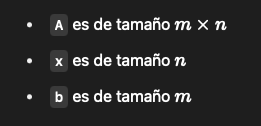

In [ ]:
# Genero matriz y vector para trabajar el SGD
A, b = generar_datos_minimos_cuadrados(20, 4)

### SGD mini-batches (1 y 2)

In [ ]:
# Ahora que tengo mis funciones previas definidas, defino algunos hiperparámetros que serán útiles para correr el proceso iterativo general
n_epoches = 10
x = np.zeros(A.shape[1]) # Acá lo que hago es definir un punto inicial en 0 para todas las coordenadas, que debe tener la misma forma que las columnas de A (n)
tolerancia = 1e-8 # Esto me va a permitir compararla vs el gradiente y establecer una condición de corte
historia = [x.copy()] # Acá guardo la historia para luego poder graficar la convergencia y sacar conclusiones
n_minibatch = 2 # Tamaño del mini-batch. Con 1 voy haciendo SGD puro
alpha = 1e-2

# Ahora sí planteo el ciclo iterativo general

for i in range(n_epoches):

  # Antes de empezar a recorrer cada época me fijo si la norma del gradiente total es menor o igual a la tolerancia pre-establecida como condición de corte (convergencia)
  grad_total = funcion_gradiente(A, x, b)

  if np.linalg.norm(grad_total) <= tolerancia:
    print(f'El algoritmo convergió en {i} épocas')
    print(f'El mínimo encontrado es: {np.round(x, 4)}')
    break

  # La idea es desordenar las muestras cada vez que arranco a correr una nueva época para asegurar una convergencia más estable
  idx = np.random.permutation(len(b)) # Genero un array de índices del tamaño de b, pero en orden aleatorio

  # Ahora recorro todas las muestras, de a minibatches de tamaño n_minibatch
  for minibatch in range(0, len(b), n_minibatch):

  # Tomo los índices correspondientes a este mini-batch
    batch_idx = idx[minibatch : minibatch + n_minibatch]

  # Selecciono las filas de A y b que me corresponden en este mini-batch
    A_batch = A[batch_idx, :]
    b_batch = b[batch_idx]

  # Calculo el gradiente sobre este mini-batch
    grad = funcion_gradiente(A_batch, x, b_batch)

  # # Calculo el alpha óptimo usando exact line search sobre este mini-batch
  #   alpha = exact_line_search(A_batch, x, b_batch)

  # Actualizo el valor de x, usando la dirección de descenso y el tamaño de paso encontrado
    x = x - alpha * grad

  # Guardo el nuevo punto en la historia
    historia.append(x.copy())

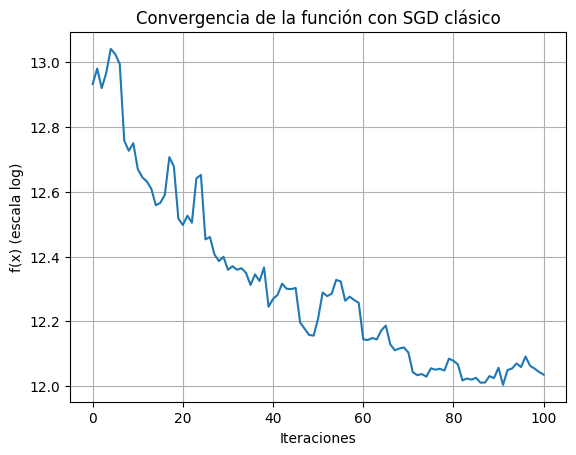

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_objetivo(A, punto, b) for punto in historia]

# Graficar
plt.plot(valores_funcion)
# plt.yscale("log")
plt.title("Convergencia de la función con SGD clásico")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

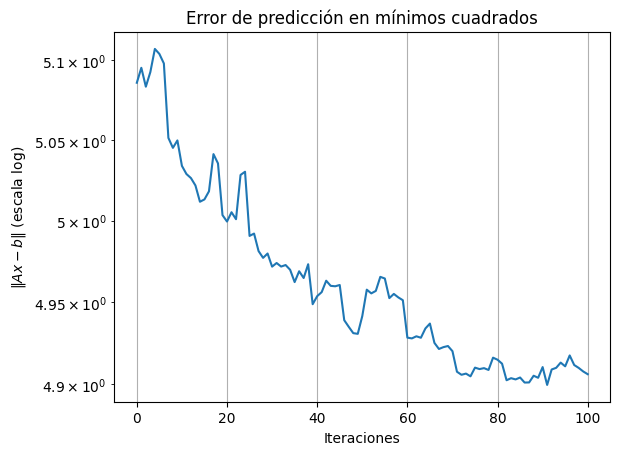

In [ ]:
errores_prediccion = [np.linalg.norm(A @ punto - b) for punto in historia]

plt.plot(errores_prediccion)
plt.yscale("log")
plt.title("Error de predicción en mínimos cuadrados")
plt.xlabel("Iteraciones")
plt.ylabel(r"$\|Ax-b\|$ (escala log)")
plt.grid(True)
plt.show()

# Ejercicio 2)

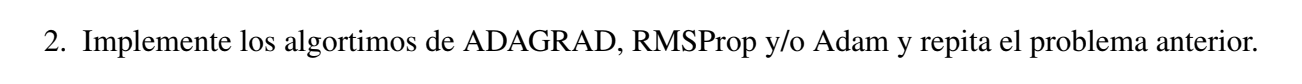

### Adagrad + SGD

In [ ]:
# Ahora que tengo mis funciones previas definidas, defino algunos hiperparámetros que serán útiles para correr el proceso iterativo general
n_epoches = 6
x = np.zeros(A.shape[1]) # Acá lo que hago es definir un punto inicial en 0 para todas las coordenadas, que debe tener la misma forma que las columnas de A (m)
tolerancia = 1e-8 # Esto me va a permitir compararla vs el gradiente y establecer una condición de corte
historia = [x.copy()] # Acá guardo la historia para luego poder graficar la convergencia y sacar conclusiones
n_minibatch = 2 # Tamaño del mini-batch. Con 1 voy haciendo SGD puro
r = np.zeros_like(x) #
gamma = 1e-8 # Este valor es discrecional. En el primer paso, el r va a quedar = 0 y no me va a permitir hacer la división en el proceso iterativo.
alpha = 1 # En los métodos adaptativos fijo el alpha

# Ahora sí planteo el ciclo iterativo general

for i in range(n_epoches):

  # Antes de empezar a recorrer cada época me fijo si la norma del gradiente total es menor o igual a la tolerancia pre-establecida como condición de corte (convergencia)
  grad_total = funcion_gradiente(A, x, b)

  if np.linalg.norm(grad_total) <= tolerancia:
    print(f'El algoritmo convergió en {i} épocas')
    print(f'El mínimo encontrado es: {np.round(x, 4)}')
    break

  # La idea es desordenar las muestras cada vez que arranco a correr una nueva época para asegurar una convergencia más estable
  idx = np.random.permutation(len(b)) # Genero un array de índices del tamaño de b, pero en orden aleatorio

  # Ahora recorro todas las muestras, de a minibatches de tamaño n_minibatch
  for minibatch in range(0, len(b), n_minibatch):

  # Tomo los índices correspondientes a este mini-batch
    batch_idx = idx[minibatch : minibatch + n_minibatch]

  # Selecciono las filas de A y b que me corresponden en este mini-batch
    A_batch = A[batch_idx, :]
    b_batch = b[batch_idx]

  # Calculo el gradiente sobre este mini-batch
    grad = funcion_gradiente(A_batch, x, b_batch)

  # Actualizo el acumulador de Adagrad
    r = r + grad**2

  # Calculo el paso adaptativo para cada coordenada
    paso = (alpha / (np.sqrt(r) + gamma)) * grad

  # Actualizo el valor de x, usando la dirección de descenso y el tamaño de paso encontrado
    x = x - paso

  # Guardo el nuevo punto en la historia
    historia.append(x.copy())

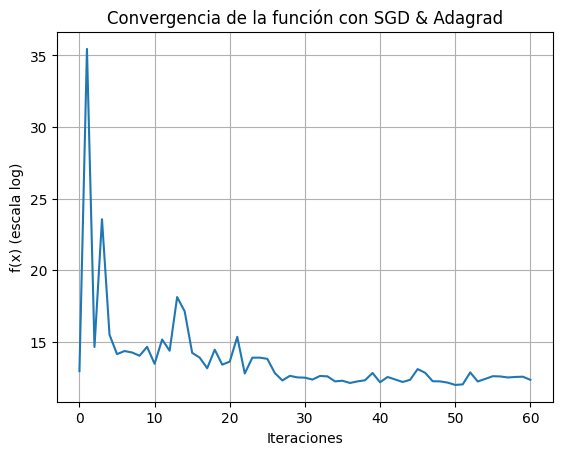

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_objetivo(A, punto, b) for punto in historia]

# Graficar
plt.plot(valores_funcion)
# plt.yscale("log")
plt.title("Convergencia de la función con SGD & Adagrad")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### RMSprop + SGD

In [ ]:
# Ahora que ya tengo mis funciones base previas, defino los hiperparámetros necesarios para plantear el proceso iterativo genérico
beta = 0.9 # Coeficiente necesario para hacer el promedio móvil de mis gradientes al cuadrado
x = np.zeros(A.shape[1]) # Misma forma que las columnas de A
historia = [x.copy()]
gamma = 1e-2
alpha = 1
n_epoches = 100
n_minibatch = 20
tolerancia = 1e-8
r = np.zeros_like(x)

# Ahora sí, planteo el ciclo iterativo genérico del RMSprop
for i in range (n_epoches):

  # Primero planteo la condición de corte
  if np.linalg.norm(funcion_gradiente(A, x, b)) <= tolerancia:
    print(f'El algoritmo convergió en {i} épocas.')
    punto_final = np.round(x[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}.')
    break

  # Randomizo los índices cada vez que arranca una época para asegurar una convergencia más estable
    idx = np.random.permutation(len(b))

  # Recorro la muestra total de a tamaños mini-batch
  for minibatch in range (0, len(b), n_minibatch):

    # Tomo los índices correspondientes a este mini-batch
    batch_idx = idx[minibatch : minibatch + n_minibatch]

    # Tomo las filas A y b correspondientes a este minibatch
    A_batch = A[batch_idx, :]
    b_batch = b[batch_idx]

    # Calculo el gradiente sobre este minibatch
    grad = funcion_gradiente(A_batch, x, b_batch)

    # Cambio r
    r = beta * r + (1 - beta) * grad ** 2

    # Actualizo el paso
    x = x - alpha / (np.sqrt(r) + gamma) * grad

    # Guardo el punto para posterior visualización y análisis de convergencia
    historia.append(x.copy())

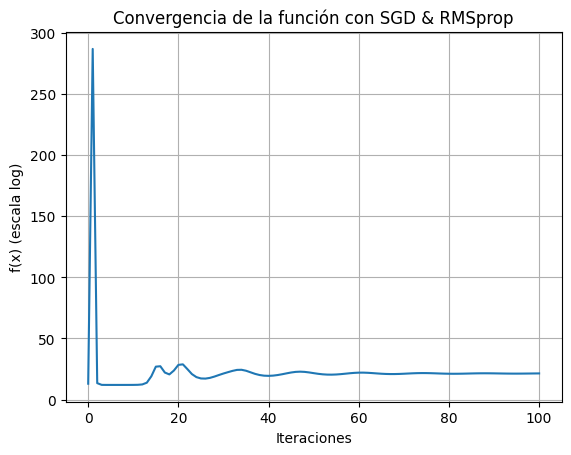

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_objetivo(A, punto, b) for punto in historia]

# Graficar
plt.plot(valores_funcion)
# plt.yscale("log")
plt.title("Convergencia de la función con SGD & RMSprop")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### Adam + SGD

In [ ]:
# En primer lugar, seteo hiperparámetros necesarios para correr el optimizador
beta_1 = 0.9
beta_2 = 0.9
x = np.zeros(A.shape[1])
r = np.zeros_like(x)
s = np.zeros_like(x)
tolerancia = 1e-8
historia = [x.copy()]
alpha = 1e-2
gamma = 1e-2
n_epoches = 100
n = 0 # Necesito este parámetro en SGD + Adam para poder ir contando el número de iteraciones y así elevar al cuadrado los betas de mi s_hat y r_hat
n_minibatch = 2

# Planteo el primer ciclo (for) que va a recorrer cada época
for i in range(n_epoches):

  # Primero planteo la condición de corte
  if np.linalg.norm(funcion_gradiente(A, x, b)) <= tolerancia:
    print(f'El algoritmo convergió en {i} iteraciones.')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}.')
    break

  # Luego armo un array que contenga los índices de mis muestras randomizados para cada época, de esta manera me aseguro un entrenamiento/convergencia más estable
  idx = np.random.permutation(len(b))

  # Luego comienza el segundo ciclo (for) para iterar cada minibatch de tamaño n preestablecido anteriormente
  for minibatch in range(0, len(b), n_minibatch):

    # Defino los índices a utilizar dependientes del tamaño del minibatch
    batch_idx = idx[minibatch : minibatch + n_minibatch]

    # Tomo "las partes" de A y b correspondientes a este minibatch
    A_batch = A[batch_idx , :]
    b_batch = b[batch_idx]

    # Calculo el gradiente para el minibatch
    grad = funcion_gradiente(A_batch, x, b_batch)

    # Ahora si, actualizo s (vector que contiene el promedio móvil del gradiente)
    s = beta_1 * s + (1 - beta_1) * grad

    # Actualizo r (vector que contiene el promedio móvil del gradiente al cuadrado)
    r = beta_2 * r + (1 - beta_2) * grad ** 2

    # Actualizo el contador de iteraciones
    n += 1

    # Corrijo el sesgo (al iniciar con s0 y r0 = 0, los primeros valores se encuentran sesgados hacia ese valor)
    s_hat = s / (1 - beta_1 ** n)
    r_hat = r / (1 - beta_2 ** n)

    # Actualizo el paso
    x = x - alpha * s_hat / (np.sqrt(r_hat) + gamma)

    # Guardo historial de mis puntos para el posterior análisis de convergencia
    historia.append(x.copy())

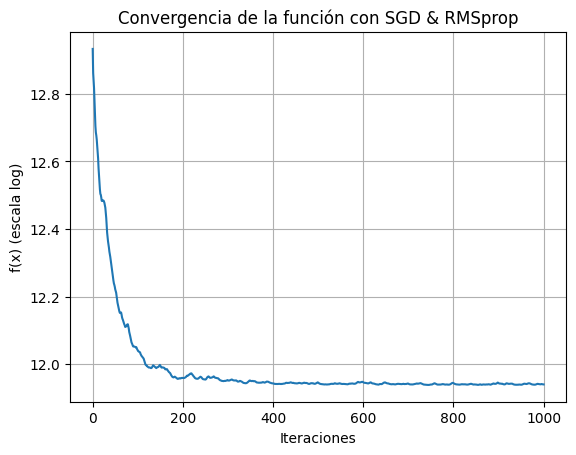

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_objetivo(A, punto, b) for punto in historia]

# Graficar
plt.plot(valores_funcion)
# plt.yscale("log")
plt.title("Convergencia de la función con SGD & RMSprop")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### Momentum + SGD

Creo una función para iterar alpha con backtracking (dinámico) según condición de Armijo.

In [ ]:
def backtracking_armijo_batch(A_batch, b_batch, x, x_prev, grad, beta=0.9, alpha0=1.0, c=1e-4, rho=0.5):
    alpha = alpha0
    d = -grad + beta * (x - x_prev)
    fx = funcion_objetivo(A_batch, x, b_batch)
    grad_dot_d = grad @ d

    while True:
        x_new = x + alpha * d
        fx_new = funcion_objetivo(A_batch, x_new, b_batch)

        if fx_new <= fx + c * alpha * grad_dot_d:
            break
        alpha *= rho  # Reduzco el paso
        if alpha < 1e-10:
            break  # Evito pasos demasiado chicos que pueden frenar todo

    return alpha

In [ ]:
# Ahora que tengo listas mis funciones previas, seteo hiperparámetros para encarar el proceso iterativo general
beta = 0.9
x = np.zeros(A.shape[1]) # Punto inicial en 0 para todas las coordenadas de la misma forma que las columnas de A (n)
x_prev = x.copy() # Punto previo que necesito guardar para cada uno de los pasos del proceso iterativo general
n_epoches = 1000
n_minibach = 2
alpha = 0.001
historia = [x.copy()] # Lista para guardar cada uno de los puntos de mi proceso iterativo necesarios para el posterior análisis de convergencia
tolerancia = 1e-8

for i in range(n_epoches):

  # Antes que nada, verifico si se cumple la condición de corte para frenar el proceso general
  if np.linalg.norm(funcion_gradiente(A, x, b)) <= tolerancia:
    print(f'El algoritmo convergió en {i} épocas.')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}.')
    break

  # En segundo lugar, creo un np array que traiga índices random. Este array debe tener el mismo tamaño que el vector b (observaciones).
  # El shuffle se va a hacer al comienzo de cada época, y el hecho de que vayan cambiando asegura una convergencia/entrenamiento más estable.
  idx = np.random.permutation(len(b))

  # Ahora si comienzo el segundo ciclo (for) que va a recorrer cada uno de los minibatches propuestos en el ejercicio
  for minibatch in range (0, len(b), n_minibatch):

    # Tomo batch_idx según el tamaño del minibatch
    batch_idx = idx[minibatch : minibatch + n_minibatch]

    # Tomo los respectivos valores de A y b
    A_batch = A[batch_idx, :]
    b_batch = b[batch_idx]

    # Calculo el gradiente en el minibatch
    grad = funcion_gradiente(A_batch, x, b_batch)

    # Defino un x temporal para no perder el punto previo al dar el siguiente paso
    x_temp = x.copy()

    # Calculo el nuevo punto
    x = x - alpha * grad + beta * (x - x_prev)

    # Actualizo memoria
    x_prev = x_temp

    # Guardo historia
    historia.append(x.copy())

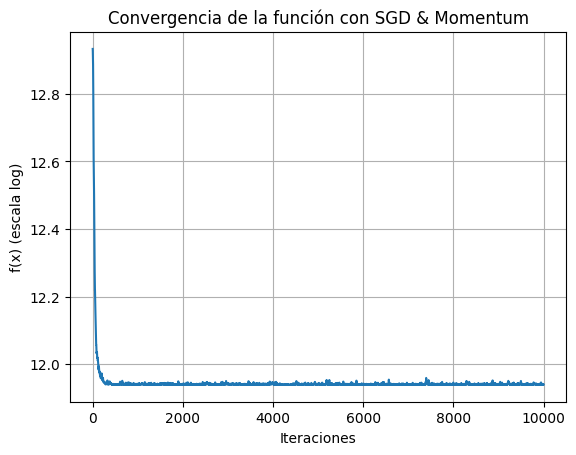

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_objetivo(A, punto, b) for punto in historia]

# Graficar
plt.plot(valores_funcion)
# plt.yscale("log")
plt.title("Convergencia de la función con SGD & Momentum")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()